In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
raw = pd.read_csv("../data/standardised_data_460.csv")

In [35]:
raw.head()

,Unnamed: 0,Group1_2,Group1_6,Group1_7,Group1_8,Group1_9,Group1_11,Group1_13,Group1_20,Group1_29,...,Group13_53,Group13_54,Group13_55,Group13_59,Group13_61,Group13_62,Group13_63,Group13_64,Response,Pass
0,1,0.874334,-0.266201,0.543541,0.574553,1.342890,1.235226,1.321755,-0.675680,1.710318,...,0.423349,-0.862193,0.318690,-0.906249,0.200239,-0.273241,-0.500197,0.345044,60.062861,1
1,2,-0.091323,-0.764775,-0.649861,-0.715328,-0.415924,-0.498352,0.428503,-0.675680,0.219189,...,0.875348,-0.591742,0.419515,0.197868,0.497625,0.450584,0.073996,0.781114,19.350732,0
2,3,-0.381372,-0.807548,-0.858235,-0.921305,-0.762647,-0.856018,0.131875,-0.675680,-0.132754,...,0.691868,-0.937465,0.667040,1.456292,0.388811,-0.381698,-0.718074,0.632852,20.227076,0
3,4,-1.349358,-0.298264,0.058341,0.129426,0.267328,0.524706,-0.816348,-0.675680,0.542728,...,0.103305,1.228970,0.422996,-0.906249,1.042529,1.347604,0.753643,0.014045,38.798884,0
4,5,1.003072,0.968025,0.487237,0.674106,0.972976,1.129411,0.534989,1.072959,0.687952,...,0.295396,0.744527,0.028754,1.361513,-0.145816,-0.172721,-0.057350,0.194580,58.174574,1


In [36]:
raw.describe()

,Unnamed: 0,Group1_2,Group1_6,Group1_7,Group1_8,Group1_9,Group1_11,Group1_13,Group1_20,Group1_29,...,Group13_53,Group13_54,Group13_55,Group13_59,Group13_61,Group13_62,Group13_63,Group13_64,Response,Pass
count,6360.000000,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,...,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6.360000e+03,6360.000000,6360.000000
mean,3180.500000,1.498705e-09,-2.001601e-10,-6.186138e-10,1.465483e-09,-2.346599e-09,2.086376e-10,-1.180848e-09,9.055054e-09,-6.169372e-10,...,3.243746e-09,-5.944576e-08,-5.386605e-09,1.219539e-08,9.614138e-10,-5.781944e-10,1.546178e-09,-7.848371e-10,38.657683,0.187736
std,1836.118188,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,12.654940,0.390532
min,1.000000,-2.751949e+00,-1.754631e+00,-3.013370e+00,-3.111490e+00,-3.429866e+00,-3.495696e+00,-2.038002e+00,-6.756795e-01,-2.204811e+00,...,-3.057958e+00,-3.196077e+00,-3.372874e+00,-9.062494e-01,-7.115465e+00,-3.335729e+00,-2.215116e+00,-3.203372e+00,0.000000,0.000000
25%,1590.750000,-5.398062e-01,-6.572152e-01,-5.427482e-01,-5.567024e-01,-5.388842e-01,-5.348021e-01,-7.344138e-01,-6.756795e-01,-7.641703e-01,...,-5.130198e-01,-8.117925e-01,-3.025455e-02,-9.062494e-01,-8.013842e-02,-5.464297e-01,-5.912172e-01,-5.772850e-01,29.704819,0.000000
50%,3180.500000,-8.243094e-03,-3.468117e-01,-1.363495e-01,-1.375045e-01,-7.281190e-02,-8.208589e-02,8.889551e-02,-6.756795e-01,1.855736e-01,...,8.168682e-02,-1.487971e-01,2.799193e-01,-4.283669e-01,1.224327e-01,-1.787957e-01,-2.625445e-01,1.861578e-02,39.214501,0.000000
75%,4770.250000,5.018809e-01,6.227599e-01,3.870408e-01,3.932446e-01,4.559657e-01,4.354593e-01,7.216281e-01,6.496107e-01,6.810584e-01,...,4.064904e-01,1.228970e+00,5.560456e-01,1.132580e+00,3.961705e-01,4.417079e-01,3.380405e-01,3.430096e-01,47.723999,0.000000
max,6360.000000,8.153074e+00,9.516410e+00,1.094358e+01,1.101156e+01,8.878317e+00,9.153810e+00,8.077421e+00,9.794999e+00,7.937239e+00,...,4.924162e+00,1.228970e+00,1.965030e+00,1.894797e+00,2.212221e+00,6.166975e+00,7.128808e+00,4.920535e+00,100.000000,1.000000


In [37]:
raw.isnull().sum()

Unnamed: 0    0
Group1_2      0
Group1_6      0
Group1_7      0
Group1_8      0
             ..
Group13_62    0
Group13_63    0
Group13_64    0
Response      0
Pass          0
Length: 166, dtype: int64

In [38]:
raw.isnull().sum().sum()

0

In [48]:
raw.drop(columns=['Unnamed: 0', 'Pass'], inplace=True)

In [49]:
raw = raw.rename(columns={'Response': 'targetVar'})

In [51]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(raw.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [52]:
if targetCol == totCol:
    X_raw = raw.iloc[:,0:totAttr]
    y_raw = raw.iloc[:,totAttr]
else:
    X_raw = raw.iloc[:,1:totCol]
    y_raw = raw.iloc[:,0]

print("Total shape: {} X shape: {} y shape: {}".format(raw.shape, X_raw.shape, y_raw.shape))

Total shape: (6360, 164) X shape: (6360, 163) y shape: (6360,)


In [53]:
X_raw = pd.get_dummies(X_raw)
print(X_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Columns: 163 entries, Group1_2 to Group13_64
dtypes: float64(163)
memory usage: 7.9 MB
None


# Splitting into test train and validation

In [54]:
# Split the data further into training, validation, and test datasets
test_size = 0.2
test_size_validation = 0.1
randomseed = 12345

X_train_val, X_test_df, y_train_val, y_test_df = train_test_split(X_raw, y_raw, test_size=test_size, random_state=randomseed)
X_train_df, X_validation_df, y_train_df, y_validation_df = train_test_split(X_train_val, y_train_val, test_size=test_size_validation, random_state=randomseed)
print("X_train_df.shape: {} y_train_df.shape: {}".format(X_train_df.shape, y_train_df.shape))
print("X_validation_df.shape: {} y_validation_df.shape: {}".format(X_validation_df.shape, y_validation_df.shape))
print("X_test_df.shape: {} y_test_df.shape: {}".format(X_test_df.shape, y_test_df.shape))

X_train_df.shape: (4579, 163) y_train_df.shape: (4579,)
X_validation_df.shape: (509, 163) y_validation_df.shape: (509,)
X_test_df.shape: (1272, 163) y_test_df.shape: (1272,)


In [55]:
X_train_df.head()

,Group1_2,Group1_6,Group1_7,Group1_8,Group1_9,Group1_11,Group1_13,Group1_20,Group1_29,Group1_30,...,Group13_51,Group13_52,Group13_53,Group13_54,Group13_55,Group13_59,Group13_61,Group13_62,Group13_63,Group13_64
2820,1.391533,0.891353,0.769318,0.967221,1.417400,1.578953,0.823432,1.312236,1.012243,0.531801,...,-0.511023,-0.216511,-0.552146,1.228970,0.154313,-0.354079,-0.052035,-0.046664,0.163677,-0.681816
5304,-0.039975,-0.811662,-0.654177,-0.725050,-0.339362,-0.409190,0.504209,-0.675679,0.354809,0.224452,...,-0.334077,-0.305175,0.305411,-0.791349,0.201854,-0.906249,-0.047601,-0.620346,-0.677498,0.224832
1887,-0.377344,-0.842216,-0.882022,-0.948350,-0.748003,-0.834318,0.151012,-0.675680,-0.080395,-0.124811,...,-0.045283,-0.140229,0.097873,1.228970,-2.276333,-0.338936,0.269177,0.168012,0.062737,0.002065
4485,-0.459854,-0.711337,-0.628464,-0.617127,-0.260941,-0.371208,0.056716,-0.675679,0.337057,0.230776,...,0.213304,-0.067047,0.964632,-0.516226,0.157884,0.787731,0.086944,-0.043255,-0.197817,0.892947
964,0.669614,1.015078,0.916928,0.975734,0.523893,0.712269,-0.773955,2.542359,-0.783668,-1.053228,...,0.619802,-0.437738,-0.158541,-1.989017,-0.050508,-0.906249,-0.497483,-1.792717,-1.461671,-0.243996


In [56]:
y_train_df.describe()

count    4579.000000
mean       38.491500
std        12.716173
min         0.000000
25%        29.557515
50%        39.074490
75%        47.608137
max        91.721570
Name: targetVar, dtype: float64

In [57]:
y_test_df.describe()

count    1272.000000
mean       39.110552
std        12.272413
min         7.672798
25%        30.329842
50%        39.577594
75%        47.876515
max        80.229209
Name: targetVar, dtype: float64

In [58]:
# Finalize the training and validation datasets for the modeling activities
X_train = X_train_df.to_numpy()
y_train = y_train_df.ravel()
X_validation = X_validation_df.to_numpy()
y_validation = y_validation_df.ravel()
print("X_train.shape: {} y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_validation.shape: {} y_validation.shape: {}".format(X_validation.shape, y_validation.shape))

X_train.shape: (4579, 163) y_train.shape: (4579,)
X_validation.shape: (509, 163) y_validation.shape: (509,)


In [59]:
X_test = X_test_df.to_numpy()
y_test = y_test_df.ravel()
print("X_test.shape: {} y_test.shape: {}".format(X_test.shape, y_test.shape))

X_test.shape: (1272, 163) y_test.shape: (1272,)


In [60]:
## Regression Modelling

MAE: 5.62582874167691
MSE: 52.701548645637885
R^2: 0.6498089821196942


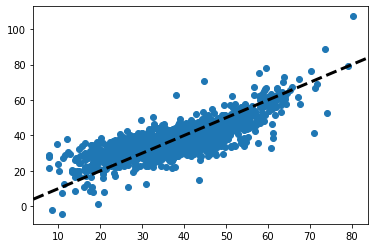

In [71]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 5.61168075970785
MSE: 53.08206777357225
R^2: 0.6472805102975423


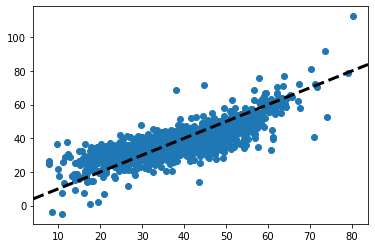

In [72]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 1427736.7158977352
MSE: 172975181470182.84
R^2: -1149384722531.0142


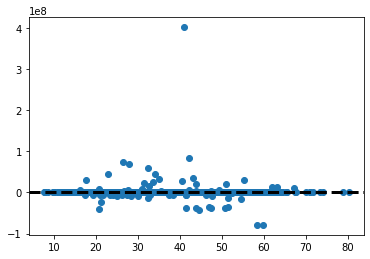

In [73]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, y_train)
# evaluate model
y_hat = ransac.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 5.5178627773631055
MSE: 51.22400029549017
R^2: 0.659626988876663


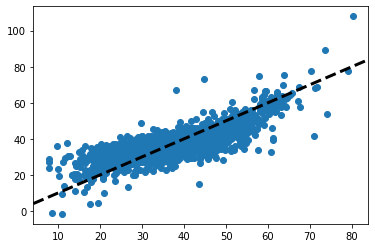

In [74]:
lasso = linear_model.LassoCV(cv=5, max_iter=2000)
lasso.fit(X_train, y_train)
# evaluate model
y_hat = lasso.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [27]:
# score = theil.score(X_test)
# score

In [28]:
# a new method

# Correlation Feature Selection
Which features directly correlate to increase / decrease in response variable

In [29]:
# correlation feature selection
def select_correlation_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [30]:
# feature selection
X_train_fs, X_test_fs, fs = select_correlation_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: nan
Feature 1: 5.815880
Feature 2: 3.796229
Feature 3: 0.892410
Feature 4: 1.608651
Feature 5: 0.934605
Feature 6: 0.657607
Feature 7: 10.585967
Feature 8: 4.715435
Feature 9: 3.804615
Feature 10: 3.213083
Feature 11: 9.587973
Feature 12: 1.052954
Feature 13: 0.429592
Feature 14: 2.178650
Feature 15: 0.199752
Feature 16: 3.181809
Feature 17: 0.828776
Feature 18: 0.030051
Feature 19: 31.465626
Feature 20: 1.273281
Feature 21: 0.047089
Feature 22: 0.644922
Feature 23: 0.114802
Feature 24: 2.715440
Feature 25: 26.078259
Feature 26: 0.537597
Feature 27: 0.042569
Feature 28: 2.519392
Feature 29: 0.371999
Feature 30: 5.187416
Feature 31: 0.922812
Feature 32: 1.600084
Feature 33: 44.361647
Feature 34: 5.939146
Feature 35: 1.296075
Feature 36: 9.853217
Feature 37: 0.044479
Feature 38: 0.002122
Feature 39: 0.289033
Feature 40: 5.165383
Feature 41: 98.011738
Feature 42: 1.820933
Feature 43: 0.123149
Feature 44: 0.001349
Feature 45: 46.046824
Feature 46: 38.731584
Feature 47: 0.000955


C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Kiera\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



Feature 71: 1.973345
Feature 72: 1.505865
Feature 73: 0.570979
Feature 74: 0.356521
Feature 75: 0.466197
Feature 76: 41.843828
Feature 77: 25.562394
Feature 78: 54.321851
Feature 79: 0.769498
Feature 80: 11.593062
Feature 81: 0.011606
Feature 82: 0.749509
Feature 83: 0.029240
Feature 84: 0.560977
Feature 85: 223.759528
Feature 86: 0.042066
Feature 87: 33.787678
Feature 88: 129.318343
Feature 89: 0.874335
Feature 90: 61.892528
Feature 91: 13.295611
Feature 92: 0.002571
Feature 93: 0.082951
Feature 94: 18.348474
Feature 95: 11.629762
Feature 96: 42.718235
Feature 97: 12.503243
Feature 98: nan
Feature 99: 1.816454
Feature 100: nan
Feature 101: 0.281837
Feature 102: 1.520168
Feature 103: 0.116609
Feature 104: 0.711833
Feature 105: 2.065570
Feature 106: 6.593152
Feature 107: 0.050498
Feature 108: 44.824257
Feature 109: 0.000169
Feature 110: 1.836754
Feature 111: 0.619835
Feature 112: 141.203620
Feature 113: 3.156598
Feature 114: 0.360050
Feature 115: 10.560058
Feature 116: 0.294046
Feature

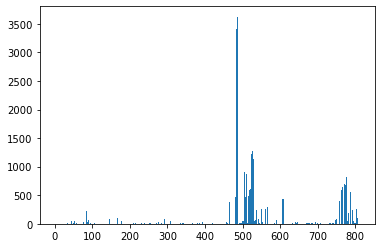

In [31]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Mutual Information Gain
Measuring the reduction of uncertainty for one variable given a known value of the other variable

In [32]:
# mutual info feature selection
def select_mutual_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [33]:
# feature selection
X_train_fs, X_test_fs, fs = select_mutual_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000340
Feature 6: 0.000371
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.000073
Feature 10: 0.002334
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000291
Feature 14: 0.000073
Feature 15: 0.000073
Feature 16: 0.000000
Feature 17: 0.000146
Feature 18: 0.000000
Feature 19: 0.010523
Feature 20: 0.000000
Feature 21: 0.001569
Feature 22: 0.000145
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.003832
Feature 26: 0.005781
Feature 27: 0.000154
Feature 28: 0.000000
Feature 29: 0.000145
Feature 30: 0.000081
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.005591
Feature 34: 0.000227
Feature 35: 0.000378
Feature 36: 0.000435
Feature 37: 0.024591
Feature 38: 0.000145
Feature 39: 0.000146
Feature 40: 0.002829
Feature 41: 0.024224
Feature 42: 0.027950
Feature 43: 0.000000
Feature 44: 0.000000
Feature 45: 0.008343
Feature 46: 0.007307
Feature 47: 0.000000
Fe

# New Models w/ Feature Selection

MAE: 1574320836475.042
R^2: -1.2357405364728095e+25


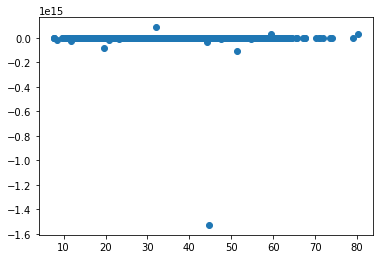

In [35]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

MAE: 1574320836475.042
R^2: -1.2357405364728095e+25


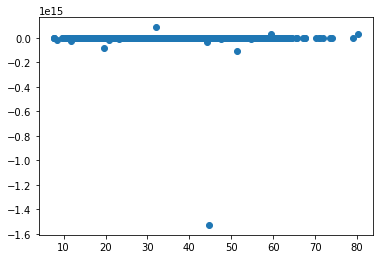

In [36]:
# fit the model
model = linear_model.LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [37]:
print(y_hat)

[45.43457031 44.99707031 44.29394531 ... 37.30566406 47.43457031
 65.70019531]


MAE: 192655249784.50308
R^2: -4.2501516398109613e+21


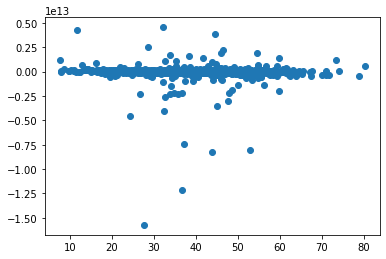

In [38]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

In [39]:
L2 = [ x for x in y_hat if 0 < x < 100 ]
L2

[]

In [40]:
y_hat.mean()
y_hat.sort()

y_modified = y_hat[(y_hat < 0 )]
y_modified

array([-1.57357580e+13, -1.21907655e+13, -8.23913357e+12, -8.03659518e+12,
       -7.43599487e+12, -4.55456748e+12, -4.08847379e+12, -3.53966112e+12,
       -2.99285740e+12, -2.65283014e+12, -2.30961596e+12, -2.30009939e+12,
       -2.27802316e+12, -2.23900060e+12, -2.23162602e+12, -2.22892914e+12,
       -1.96750925e+12, -1.92781109e+12, -1.44422387e+12, -1.34121921e+12,
       -1.33694879e+12, -1.06242293e+12, -1.00094577e+12, -9.84733461e+11,
       -8.76437710e+11, -8.28942967e+11, -8.11965943e+11, -7.85141483e+11,
       -6.61858741e+11, -6.59893366e+11, -6.36868275e+11, -5.94707136e+11,
       -5.90902841e+11, -5.88688169e+11, -5.76655001e+11, -5.35573617e+11,
       -5.13152549e+11, -4.97643373e+11, -4.94928528e+11, -4.72314054e+11,
       -4.69193054e+11, -4.33044732e+11, -4.11438973e+11, -4.09810739e+11,
       -4.08297190e+11, -4.07556920e+11, -3.97080454e+11, -3.92389586e+11,
       -3.92243161e+11, -3.74826906e+11, -3.66031694e+11, -3.62556438e+11,
       -3.58324992e+11, -

In [76]:
# fit the model
model = linear_model.SGDRegressor()
model.fit(X_train_fs, y_train)
# evaluate the model
y_hat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print('MAE: {0}'.format(mae))
print('MSE: {0}'.format(mse))
print('R^2: {0}'.format(r2))
#plot
plt.scatter(y_test, y_hat)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

NameError: name 'X_train_fs' is not defined

# Validator 

## Full Dataset

In [42]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


Best: -5.440054 using {'n_estimators': 200}
-5.691936 (0.111794) with: {'n_estimators': 10}
-5.505797 (0.093123) with: {'n_estimators': 50}
-5.482260 (0.112615) with: {'n_estimators': 100}
-5.458465 (0.097190) with: {'n_estimators': 150}
-5.440054 (0.085997) with: {'n_estimators': 200}


In [43]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 200


In [44]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
Mean Absolute Error: 4.999864213682121
R^2 Score: 0.742593140979435


In [45]:
# Combining the training and validation datasets to form the complete dataset that will be used for training the final model
X_complete = np.vstack((X_train, X_validation))
y_complete = np.concatenate((y_train, y_validation))
print("X_complete.shape: {} y_complete.shape: {}".format(X_complete.shape, y_complete.shape))
test_model = validation_model.fit(X_complete, y_complete)
print(test_model)

X_complete.shape: (5088, 811) y_complete.shape: (5088,)
ExtraTreesRegressor(n_estimators=200, n_jobs=-1)


In [75]:
test_predictions = test_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

NameError: name 'test_model' is not defined

## Feature Selected
### Mutual Feature Information Gain

In [48]:
# mutual info feature selection
def select_mutual_features_validation(X_train, y_train, X_test, X_validation):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    # transform validation input data
    X_validation_fs = fs.transform(X_validation)
    return X_train_fs, X_test_fs, X_validation_fs, fs

In [49]:
# create feature selected versions
X_train_fs, X_test_fs, X_validation_fs, fs = select_mutual_features_validation(X_train, y_train, X_test, X_validation)

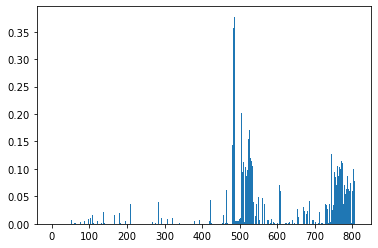

In [50]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [51]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train_fs, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


Best: -5.473670 using {'n_estimators': 100}
-5.759389 (0.133476) with: {'n_estimators': 10}
-5.550773 (0.106295) with: {'n_estimators': 50}
-5.473670 (0.097520) with: {'n_estimators': 100}
-5.487929 (0.089615) with: {'n_estimators': 150}
-5.489186 (0.093256) with: {'n_estimators': 200}


In [52]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 100


In [53]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train_fs, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation_fs)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_jobs=-1)
Mean Absolute Error: 5.037583238137034
R^2 Score: 0.7405715206117973


In [54]:
test_predictions = test_model.predict(X_test_fs)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.132753808635574
R^2 Score: 0.6973516363082936


## Feature Selected
### Correlated Features

In [55]:
# correlation feature selection
def select_correlation_features_validation(X_train, y_train, X_test, X_validation):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    # transform validation input data
    X_validation_fs = fs.transform(X_validation)
    return X_train_fs, X_test_fs, X_validation_fs, fs

In [56]:
# create feature selected versions
X_train_fs, X_test_fs, X_validation_fs, fs = select_correlation_features_validation(X_train, y_train, X_test, X_validation)

C:\Users\Kiera\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Kiera\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


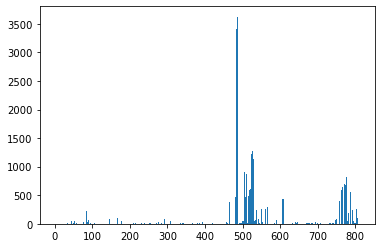

In [57]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [58]:
# Set up the comparison array
tune_results = []

tune_model = ExtraTreesRegressor(n_jobs=-1)

paramGrid = dict(n_estimators=np.array([10, 50, 100, 150, 200]))

kfold = KFold(n_splits=5, shuffle=True)
grid1 = GridSearchCV(estimator=tune_model, param_grid=paramGrid, scoring="neg_mean_absolute_error", cv=kfold, n_jobs=-1, verbose=1)

grid_result = grid1.fit(X_train_fs, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
tune_results.append(grid_result.cv_results_['mean_test_score'])
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


Best: -5.500879 using {'n_estimators': 200}
-5.760417 (0.119399) with: {'n_estimators': 10}
-5.525727 (0.129480) with: {'n_estimators': 50}
-5.504317 (0.134811) with: {'n_estimators': 100}
-5.501352 (0.136683) with: {'n_estimators': 150}
-5.500879 (0.129113) with: {'n_estimators': 200}


In [59]:
best_paramKey = list(grid_result.best_params_.keys())[0]
best_paramValue = list(grid_result.best_params_.values())[0]
print("Captured the best parameter for Extra Trees:", best_paramKey, '=', best_paramValue)

Captured the best parameter for Extra Trees: n_estimators = 200


In [60]:
validation_model = ExtraTreesRegressor(n_estimators=best_paramValue, n_jobs=-1)
validation_model.fit(X_train_fs, y_train)
print(validation_model)
predictions = validation_model.predict(X_validation_fs)
print('Mean Absolute Error:', mean_absolute_error(y_validation, predictions))
print('Mean Squared Error:', mean_squared_error(y_validation, predictions))
print('R^2 Score:', r2_score(y_validation, predictions))

ExtraTreesRegressor(n_estimators=200, n_jobs=-1)
Mean Absolute Error: 5.006485330313515
R^2 Score: 0.7424531993238537


In [61]:
test_predictions = test_model.predict(X_test_fs)
print('Mean Absolute Error:', mean_absolute_error(y_test, test_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, test_predictions))
print('R^2 Score:', r2_score(y_test, test_predictions))

Mean Absolute Error: 5.132753808635575
R^2 Score: 0.6973516363082936
